Base Ball Case Study

In [71]:
# Accordingly we import few libraries
import pandas as pd # used for data analysis and manupulation.
import numpy as np # used for mathematical opearation of data.
import seaborn as sns # this libraray is used to make statistical graphics to analyse problem statement.
import matplotlib.pyplot as plt # its is a numerical extention of numpy and also used for data visualization and graphical plotting

from sklearn.preprocessing import LabelEncoder# used for normalising labels(non numerical to numerical labels)
from sklearn.model_selection import train_test_split # used to split the available data to test and train the model
from sklearn.linear_model import LinearRegression# supervised machine learning algorithm used to find relationship between the varibles.
from sklearn.ensemble import RandomForestRegressor# help determine the most important feature selction for our model that increases accuracy and reduce error.
from sklearn.linear_model import Ridge# Supervised machine learning language

import warnings
warnings.filterwarnings('ignore')# ignores the warnings that are not really necessary.

In [37]:
# Load the data set 
df= pd.read_csv('baseball.csv')# this read the datdaset file

In [38]:
df.head()# this gives upto five sets of data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [39]:
df.columns # getting the names of the columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [40]:
# As the column names are in initials we rewrite them in more understable names
df=df.rename(columns={'W':'Wins',
                      'R':'Runs',
                      'AB':'At Bats',
                      'H':'Hits',
                      '2B':'Doubles',
                      '3B':'Triples',
                      'HR':'Homeruns',
                      'BB':'Walks',
                      'SO':'Strikeouts',
                      'SB':'Stolen Bases',
                      'RA':'Runs Allowed',
                      'ER':'Earned Runs',
                      'ERA':'Earned Run Average',
                      'CG':'Complete Games',
                      'SHO':'Shutouts',
                      'SV':'Saves',
                      'E':'Errors'})
df

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [41]:
# Lets analyse the number of rows and columns of our dataset
df.shape # As we see we have 30 rows and 17 columns

(30, 17)

In [42]:
# Its very important that no values is missing in our dataset for a good accuracy of our model hence its a pre requisite to check for null values.
df.isnull().sum()

Wins                  0
Runs                  0
At Bats               0
Hits                  0
Doubles               0
Triples               0
Homeruns              0
Walks                 0
Strikeouts            0
Stolen Bases          0
Runs Allowed          0
Earned Runs           0
Earned Run Average    0
Complete Games        0
Shutouts              0
Saves                 0
Errors                0
dtype: int64

 From the above we see that there are no null values in our dataset.

In [43]:
df.info()# knowing the type of data is important to know what kind of operations could be performed on that particular dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs                30 non-null     int64  
 2   At Bats             30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Homeruns            30 non-null     int64  
 7   Walks               30 non-null     int64  
 8   Strikeouts          30 non-null     int64  
 9   Stolen Bases        30 non-null     int64  
 10  Runs Allowed        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Games      30 non-null     int64  
 14  Shutouts            30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

infering the above we say that Earnes Run Average is float type and rest all is int type. since there is no object type no categorical data.

<AxesSubplot:>

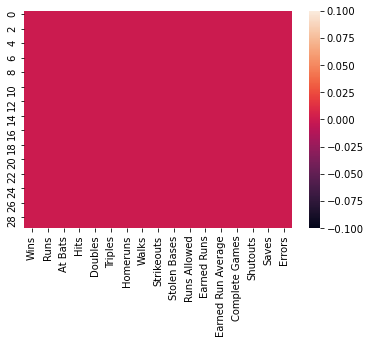

In [44]:
#Visulalizing the data set through heatmap to be sure of no null values
sns.heatmap(df.isna())

As per the graph its unicolor indicating no null values in the dataset.

In [45]:
# LEt us check for the correlation between the features of our dataset
df.corr()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At Bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Homeruns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strikeouts,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen Bases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

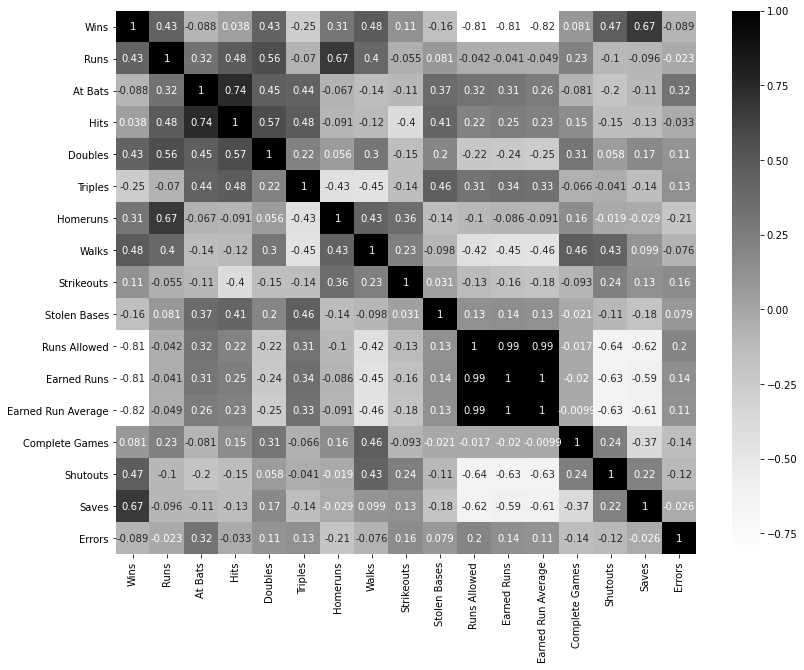

In [46]:
# let us plot the corr relation
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True,cmap='Greys')

Inferrence from the correlation table:
 1) The column 'saves' with 67% and column 'Walks' with 48% and column 'shutouts' with 47% can be considered to have strong bond.
 2) whereas the columns 'earned run average' with -82%,'earned runs'with-81% and 'runs allowed' with -81% has negative values indicating a very poor bond. 

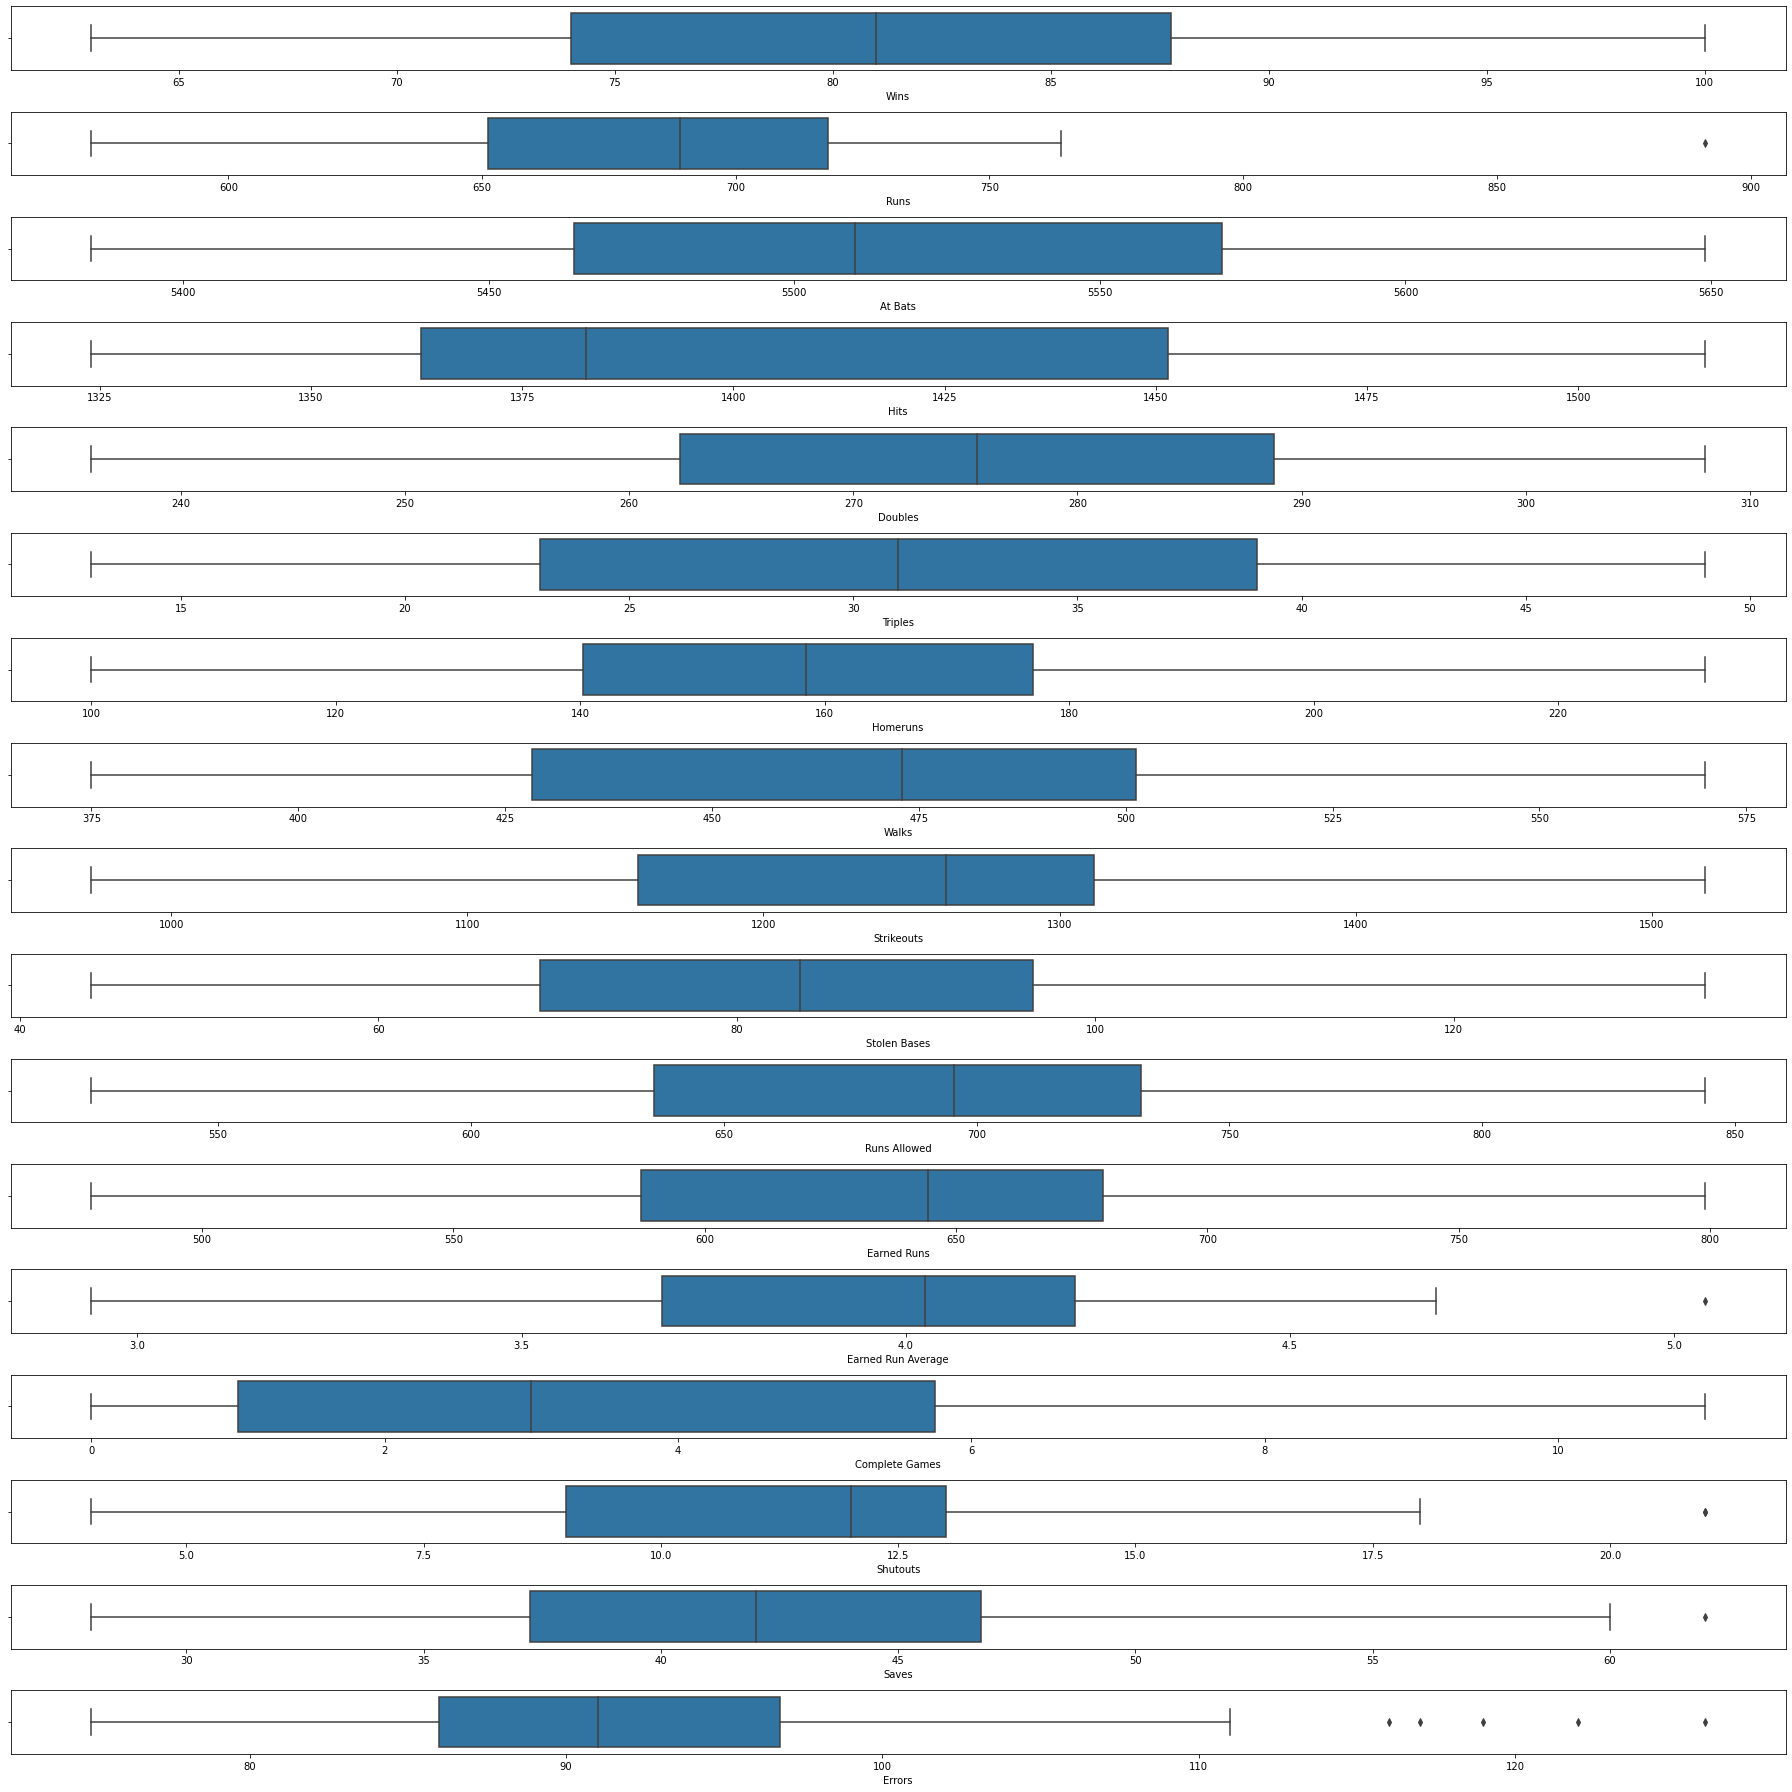

In [52]:
# Analysing the outliers
fig, axis=plt.subplots(17, figsize=(25,25))
plt1 =sns.boxplot(df['Wins'],ax=axis[0])
plt2 =sns.boxplot(df['Runs'],ax=axis[1])
plt3 =sns.boxplot(df['At Bats'],ax=axis[2])
plt4 =sns.boxplot(df['Hits'],ax=axis[3])
plt5 =sns.boxplot(df['Doubles'],ax=axis[4])
plt6 =sns.boxplot(df['Triples'],ax=axis[5])
plt7 =sns.boxplot(df['Homeruns'],ax=axis[6])
plt8 =sns.boxplot(df['Walks'],ax=axis[7])
plt9 =sns.boxplot(df['Strikeouts'],ax=axis[8])
plt10 =sns.boxplot(df['Stolen Bases'],ax=axis[9])
plt11=sns.boxplot(df['Runs Allowed'],ax=axis[10])
plt12=sns.boxplot(df['Earned Runs'],ax=axis[11])
plt13 =sns.boxplot(df['Earned Run Average'],ax=axis[12])
plt14=sns.boxplot(df['Complete Games'],ax=axis[13])
plt15=sns.boxplot(df['Shutouts'],ax=axis[14])
plt16=sns.boxplot(df['Saves'],ax=axis[15])
plt17=sns.boxplot(df['Errors'],ax=axis[16])
plt.tight_layout()


From the above BoxPlot we can observe that:
1. columns with outliers:Runs,Saves,Shutouts,Earned Run Average and Errors.


In [53]:
# Though the outliers are few lets remove that and make our data clean.
# we use zscore technique for removing outliers
from scipy.stats import zscore

z=np.abs(zscore(df))
z.shape


(30, 17)

In [57]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [61]:
df_fresh=df[(z<3).all(axis=1)]
print(df_fresh.shape)


(29, 17)


In [62]:
# Checking for skewness
df.skew()

Wins                  0.047089
Runs                  1.200786
At Bats               0.183437
Hits                  0.670254
Doubles              -0.230650
Triples               0.129502
Homeruns              0.516441
Walks                 0.158498
Strikeouts           -0.156065
Stolen Bases          0.479893
Runs Allowed          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Complete Games        0.736845
Shutouts              0.565790
Saves                 0.657524
Errors                0.890132
dtype: float64

The default allowed value of skew varies between -0.5 to 0.5. Anything outside this range is considered to be skewed data.
Accordingly 1. Runs, 2. Hits, 3.Homeruns, 4.Complete Games, 5. Shutouts 6. Saves and &. Errors looks skewed.

In [64]:
x=df_fresh.drop(['Wins'],axis=1)
y=df_fresh['Wins']

In [66]:
# Removing Skewness
from sklearn.preprocessing import power_transform
x=power_transform(x)
x

array([[ 9.62543504e-01,  0.00000000e+00,  0.00000000e+00,
         1.68518793e+00,  1.00615029e+00, -7.41927000e-01,
        -1.60519802e+00, -2.55061247e+00,  9.36131648e-01,
        -6.60978697e-01, -5.08052224e-01, -5.09292146e-01,
        -3.07098204e-01, -7.87002186e-01,  1.53275292e+00,
        -3.48265262e-01],
       [ 2.98863300e-01,  0.00000000e+00,  0.00000000e+00,
         1.38197902e-01,  1.18522654e+00, -1.09958425e-01,
        -4.62095966e-01,  9.36832915e-02, -5.16377335e-01,
         1.60225829e-01,  2.35800488e-01,  2.41440214e-01,
        -3.07098204e-01,  2.36736538e-01,  3.12020186e-01,
        -5.40819806e-01],
       [-3.12105130e-01,  0.00000000e+00,  0.00000000e+00,
         1.90738550e+00, -2.28819392e-01, -6.64354121e-01,
         1.23209786e+00, -9.35611465e-01,  2.25038365e-01,
        -6.74967476e-01, -7.52213881e-01, -6.42097599e-01,
         2.01131531e+00, -2.52844176e-01, -6.64136739e-01,
        -1.32612477e+00],
       [-1.30829774e+00,  0.00000000e

In [67]:
# Scaling the data to avoid over fitting of the model using standard scaler
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 9.62543504e-01,  0.00000000e+00,  0.00000000e+00,
         1.68518793e+00,  1.00615029e+00, -7.41927000e-01,
        -1.60519802e+00, -2.55061247e+00,  9.36131648e-01,
        -6.60978697e-01, -5.08052224e-01, -5.09292146e-01,
        -3.07098204e-01, -7.87002186e-01,  1.53275292e+00,
        -3.48265262e-01],
       [ 2.98863300e-01,  0.00000000e+00,  0.00000000e+00,
         1.38197902e-01,  1.18522654e+00, -1.09958425e-01,
        -4.62095966e-01,  9.36832915e-02, -5.16377335e-01,
         1.60225829e-01,  2.35800488e-01,  2.41440214e-01,
        -3.07098204e-01,  2.36736538e-01,  3.12020186e-01,
        -5.40819806e-01],
       [-3.12105130e-01,  0.00000000e+00,  0.00000000e+00,
         1.90738550e+00, -2.28819392e-01, -6.64354121e-01,
         1.23209786e+00, -9.35611465e-01,  2.25038365e-01,
        -6.74967476e-01, -7.52213881e-01, -6.42097599e-01,
         2.01131531e+00, -2.52844176e-01, -6.64136739e-01,
        -1.32612477e+00],
       [-1.30829774e+00,  0.00000000e

In [120]:
# Train test Split to train and test model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.21, random_state=15)

MODEL TRANING: Linear Regression

In [121]:
Lin_Reg=LinearRegression(fit_intercept=True)
Lin_Reg.fit(x_train, y_train)
Lin_Reg.intercept_

81.08318297974353

Predicting result for new values apart from training data:


In [122]:
y_pred=Lin_Reg.predict(x_test)
y_pred

array([96.98222931, 98.53837702, 87.32118684, 84.70172157, 84.57827142,
       65.67013802, 84.62038223])

MODEL TRAINING:Ridge Regression

In [123]:
Reg=Ridge( alpha=0.5)
Reg.fit(x_train, y_train)
Reg.intercept_


80.33659279606178

In [132]:
Reg_pred=Reg.predict(x_test)
Reg_pred

array([91.8964659 , 97.51733577, 81.96667974, 74.34159869, 87.49721025,
       65.18067554, 82.36122519])

MODEL TRAINING:Random Forest Regressor

In [133]:
Random=RandomForestRegressor(max_depth=3,random_state=0)
Random.fit(x_train, y_train)


RandomForestRegressor(max_depth=3, random_state=0)

In [134]:
Ran_pred=Random.predict(x_test)
Ran_pred

array([88.10166955, 88.27701984, 80.55830051, 73.82252706, 88.52566162,
       73.73510786, 78.98744589])

R Square

In [135]:
from sklearn import metrics
rs_lr=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
rs_ridge=np.sqrt(metrics.mean_squared_error(y_test,Reg_pred))
rs_ran=np.sqrt(metrics.mean_squared_error(y_test,Ran_pred))
print(rs_lr)
print(rs_ridge)
print(rs_ran)


5.615231745724677
2.6509713818279095
6.888032426593035


The Ridge Regression here gives the best value as it is the lowest.

In [138]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))
print(r2_score(y_test, Reg_pred))
print(r2_score(y_test, Ran_pred))

0.7763447379340597
0.95015130079672
0.6634619940966909


The Ridge Regression r2 square is closest to 1. Hence can say Ridge Regression is the best fit model.

In [143]:
# saving Model
import pickle
name='Base_Ball_study_1.pkl'
pickle.dump(Reg, open(name,'wb'))